In [5]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [2]:
image_path = '../output_video/cropped_image.jpg'
image= cv2.imread(image_path)
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

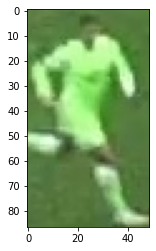

In [3]:
plt.imshow(image)
plt.show()

# Take the Top Half of the image

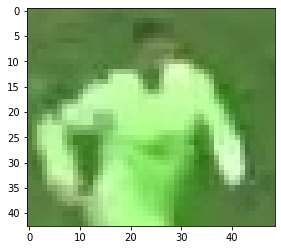

In [7]:
top_half_image=image[0:int(image.shape[0]/2),:]
plt.imshow(top_half_image)
plt.show()


# Cluster the image into two cluster

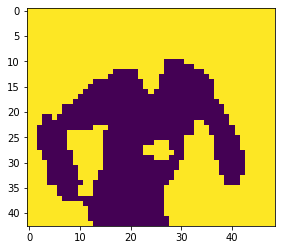

In [14]:
#Reshape the image to 2D array
image_2d=top_half_image.reshape(-1,3)
#perform kmeans clustering with 2 clusters
kmeans=KMeans(n_clusters=2,random_state=0)
kmeans.fit(image_2d)

#get the cluster labels
labels=kmeans.labels_

#reshape the labels into the original image shape
clustered_image=labels.reshape(top_half_image.shape[0],top_half_image.shape[1])

# Display the culstered image
plt.imshow(clustered_image)

In [15]:
corner_clusters=[clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_cluster=max(set(corner_clusters),key=corner_clusters.count)
print('Non player cluster:',non_player_cluster)

Non player cluster: 1


In [16]:
player_cluster=1-non_player_cluster
print(player_cluster)

0


In [18]:
kmeans.cluster_centers_[player_cluster]

array([171.27469553, 235.67253045, 143.06495264])